# Pandas

In [3]:
import pandas as pd
import numpy as np

## 载入数据

In [20]:
l = [1,2,3]
pd.Series(l)

0    1
1    2
2    3
dtype: int64

In [ ]:
with open('./ds/Data.csv', 'r', encoding='utf-8') as f:
    print(f.read())

In [381]:
# index_col 使用 第 0 列 作为 row index
# df = pd.read_csv('./ds/Data.csv', index_col=0 )
df = pd.read_csv('./ds/Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [386]:
# 保存数据
row_index = 2
new_df = df.loc[row_index,:]
new_df.to_csv('./ds/output.csv')
new_df = pd.read_csv('./ds/output.csv', index_col=0)
new_df

,2
Country,Germany
Age,30.0
Salary,54000.0
Purchased,No


In [33]:
# 从网络读取
pd.read_html("https://mofanpy.com/tutorials/data-manipulation/pandas/read-save/")

[   学号  姓名   身高  体重   肺活量
 0   1  小明  168  60  3200
 1   2  小黄  187  80  3800
 2   3  小花  170  70  3400]

## 数据序列Series

In [28]:
pd.Series(l)

# 自定义索引
pd.Series(l, index=["a", "b", "c"])

s = pd.Series(l, index=["b", "c", "d"])
s

b    1
c    2
d    3
dtype: int64

In [29]:
s.to_numpy()

array([1, 2, 3])

In [31]:
s.values.tolist()

[1, 2, 3]

## 数据表DataFrame

In [46]:
df = pd.DataFrame({"col1": [1,3], "col2": [2, 4]})
df['col1']

0    1
1    3
Name: col1, dtype: int64

In [49]:
df.index
df.columns
df.values

array([[1, 2],
       [3, 4]])

In [50]:
#
json_data = [
  {"age": 12, "height": 111},
  {"age": 13, "height": 123}
]
pd.DataFrame(json_data, index=["jack", "rose"])

,age,height
jack,12,111
rose,13,123


## 数据选择

In [77]:
data = np.arange(-12, 12).reshape((6, 4))
df = pd.DataFrame(
  data, 
  index=list("abcdef"), 
  columns=list("ABCD"))
df

,A,B,C,D
a,-12,-11,-10,-9
b,-8,-7,-6,-5
c,-4,-3,-2,-1
d,0,1,2,3
e,4,5,6,7
f,8,9,10,11


In [54]:
# Numpy 选取数据是按维度的先后（先选第一维，再第二，以此类推）
data[:,[0,1]]

array([[-12, -11],
       [ -8,  -7],
       [ -4,  -3],
       [  0,   1],
       [  4,   5],
       [  8,   9]])

In [53]:
df[['A','B']]

,A,B
a,-12,-11
b,-8,-7
c,-4,-3
d,0,1
e,4,5
f,8,9


In [56]:
# 选择从 0 到 3-1 行的，1 到 3-1 列，
data[0:3, 1:3]

array([[-11, -10],
       [ -7,  -6],
       [ -3,  -2]])

In [58]:
df.loc["a":"c", "B":"C"]

,B,C
a,-11,-10
b,-7,-6
c,-3,-2


In [59]:
# 选择第3行，第1行
data[[3,1], :]

array([[ 0,  1,  2,  3],
       [-8, -7, -6, -5]])

In [62]:
df.loc[['d', 'b'],:]

,A,B,C,D
d,0,1,2,3
b,-8,-7,-6,-5


In [78]:
# iloc 的选取方式简直和 Numpy 的模式一模一样
df.iloc[[3,1],:]

,A,B,C,D
d,0,1,2,3
b,-8,-7,-6,-5


In [79]:
# 混搭模式 loc 和 icol
row_labels = df.index[2:4]
print("row_labels:\n", row_labels)
print("\ndf:\n", df.loc[row_labels, ["A", "C"]])

row_labels:
 Index(['c', 'd'], dtype='object')

df:
    A  C
c -4 -2
d  0  2


In [81]:
col_labels = df.columns[[0, 2]]
print("col_labels:\n", col_labels)
print("\ndf:\n", df.loc[row_labels, col_labels])

col_labels:
 Index(['A', 'C'], dtype='object')

df:
    A  C
c -4 -2
d  0  2


In [82]:
# 获取 indexer a 和 b 的 序号
df.index.get_indexer(["a", "b"]) 

array([0, 1])

## 条件过滤筛选

In [83]:
df['A'] < 0


a     True
b     True
c     True
d    False
e    False
f    False
Name: A, dtype: bool

In [85]:
# A 列 < 0
df[df['A'] < 0]
df[df['A'] < 0]['A']

a   -12
b    -8
c    -4
Name: A, dtype: int64

In [91]:
s = df.iloc[0] < -10
s

A     True
B     True
C    False
D    False
Name: a, dtype: bool

In [92]:
# ~ 表示 非
df.loc[:, ~s]

,C,D
a,-10,-9
b,-6,-5
c,-2,-1
d,2,3
e,6,7
f,10,11


In [89]:
# 还能用或 | 来表示 or 的意思, & 表述 and
i0 = df.iloc[0]
s = ~(i0 < -10) | (i0 < -11)
s

A     True
B    False
C     True
D     True
Name: a, dtype: bool

In [90]:
df.loc[:, s]

,A,C,D
a,-12,-10,-9
b,-8,-6,-5
c,-4,-2,-1
d,0,2,3
e,4,6,7
f,8,10,11


In [95]:
# 可以用 .loc 或者 .iloc 来做过滤处理，然后再用 .loc 来做筛选
df.loc[:, ~(df.iloc[0] < -10)]

,C,D
a,-10,-9
b,-6,-5
c,-2,-1
d,2,3
e,6,7
f,10,11


In [96]:
df.iloc[0] < -10

A     True
B     True
C    False
D    False
Name: a, dtype: bool

In [40]:
# 构建 dataframe
data = np.array([
    [1.39, 1.77, None],
    [0.34, 1.91, -0.05],
    [0.34, 1.47, 1.22],
    [None, 0.27, -0.61]
])
df = pd.DataFrame(data, index=["r0", "r1", "r2", "r3"], columns=["c0", "c1", "c2"])
df

,c0,c1,c2
r0,1.39,1.77,None
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22
r3,None,0.27,-0.61


In [41]:
# df.mean()
df.mean(axis=0)

c0    0.690000
c1    1.355000
c2    0.186667
dtype: float64

In [54]:
df.mean(axis=0, skipna=False)
# df.mean(axis=0, skipna=True)

/var/folders/2x/gm9jcczn51950bylhpgf4ppm0000gp/T/ipykernel_56941/3164911803.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=0, skipna=False)


c1    1.355
dtype: float64

### 删除空值

In [59]:
df.dropna().values#.max()

array([[0.34, 1.91, -0.05],
       [0.34, 1.47, 1.22]], dtype=object)

In [72]:
# 默认按行删除
df.dropna()
# ==
# df.dropna(axis=0)

,c0,c1,c2
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22


In [73]:
df.dropna(axis=1)

,c1
r0,1.77
r1,1.91
r2,1.47
r3,0.27


In [75]:
# 数据只要有值你就想留下来，只去除掉那些全为空的数据
# df.dropna(how='all')

# 默认 how = 'any'
df.dropna(how='any')

,c0,c1,c2
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22


### 填充

- 对空值进行填充

In [77]:

df.fillna(111)

,c0,c1,c2
r0,1.39,1.77,111.00
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22
r3,111.00,0.27,-0.61


- 对不同特征列做差异化的填充数值

In [78]:
values = {"c0": 0, "c1": 2, "c2": 3}
df.fillna(value=values)

,c0,c1,c2
r0,1.39,1.77,3.00
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22
r3,0.00,0.27,-0.61


- 用一个全新的 df 来做空位的填充

In [85]:
df2 = pd.DataFrame(np.arange(12).reshape((4,3)), index=["r0", "r1", "r2", "r3"], columns=["c0", "c1", "c2"])
print(df2)
df.fillna(df2)

    c0  c1  c2
r0   0   1   2
r1   3   4   5
r2   6   7   8
r3   9  10  11


,c0,c1,c2
r0,1.39,1.77,2
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22
r3,9,0.27,-0.61


### 获取索引

- idxmax
- idxmin

In [86]:
df = pd.DataFrame([[1, 2, 3, 0],
                   [3, 4, None, 1],
                   [3, 5, 2, 1],
                   [3, 2, 2, 3]],
                  columns=list("ABCD"))
print(df)
print("\nidxmax():\n", df.idxmax())
# skipna 对空值做控制
print("\nidxmax(skipna=False):\n", df.idxmax(skipna=False))
print("\nidxmin():\n", df.idxmin())

   A  B    C  D
0  1  2  3.0  0
1  3  4  NaN  1
2  3  5  2.0  1
3  3  2  2.0  3

idxmax():
 A    1
B    2
C    0
D    3
dtype: int64

idxmax(skipna=False):
 A    1.0
B    2.0
C    NaN
D    3.0
dtype: float64

idxmin():
 A    0
B    0
C    2
D    0
dtype: int64


## 数据可视化技术

参考 [官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

### 散点图Scatter


<AxesSubplot:xlabel='x', ylabel='y'>

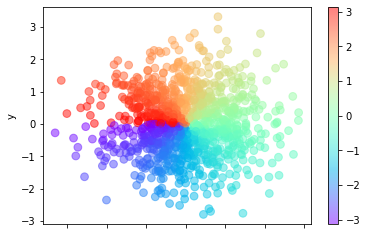

In [90]:
n = 1024    # data size
df = pd.DataFrame({
    "x": np.random.normal(0, 1, n),
    "y": np.random.normal(0, 1, n), 
})
color = np.arctan2(df["y"], df["x"])
# c: 对于这组数据中每个（x,y）数据点的颜色值
# s: 画点的大小（size）
# cmap：colormap，https://matplotlib.org/stable/tutorials/colors/colormaps.html
df.plot.scatter(x="x", y="y", c=color, s=60, alpha=.5, cmap="rainbow")

### 折线图Plot

- 单线

<AxesSubplot:xlabel='x'>

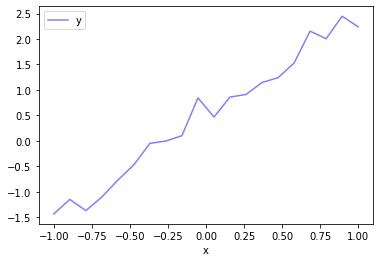

In [93]:
n = 20    # data size
x = np.linspace(-1, 1, n)
y = x * 2 + 0.4 + np.random.normal(0, 0.3, n)
df = pd.DataFrame({
    "x": x,
    "y": y, 
})
df.plot(x="x", y="y", alpha=.5, c="b")

- 多条线


<AxesSubplot:xlabel='x'>

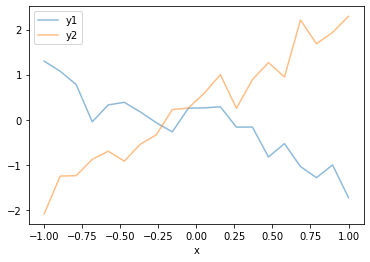

In [92]:
n = 20    # data size
x = np.linspace(-1, 1, n)
y1 = x * -1 - 0.1 + np.random.normal(0, 0.3, n)
y2 = x * 2 + 0.4 + np.random.normal(0, 0.3, n)
df = pd.DataFrame({
    "x": x,
    "y1": y1,
    "y2": y2, 
})
df.plot(x="x", y=["y1", "y2"], alpha=.5)

### 条形图 Bar


<AxesSubplot:>

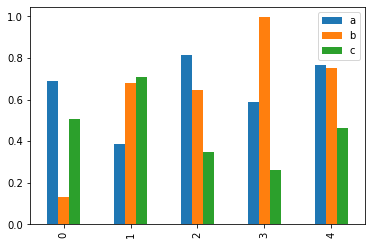

In [94]:
# abc 三家公司，这 5 年的营收对比
df = pd.DataFrame(np.random.rand(5, 3), columns=["a", "b", "c"])
df.plot.bar()

<AxesSubplot:>

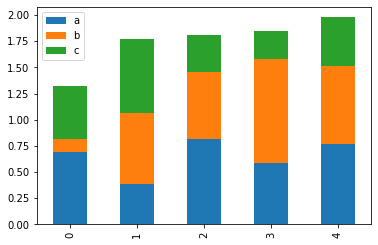

In [95]:
# 放在一起来看占比多少
df.plot.bar(stacked=True)

<AxesSubplot:>

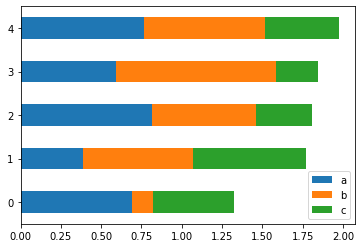

In [96]:
# 换成 竖图

df.plot.barh(stacked=True)

### 分布图 Histograms

<AxesSubplot:ylabel='Frequency'>

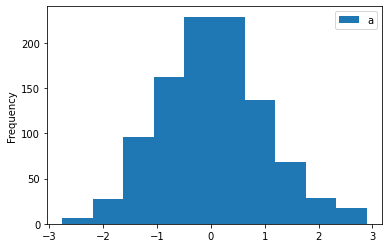

In [98]:
df = pd.DataFrame({"a": np.random.randn(1000)})

df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

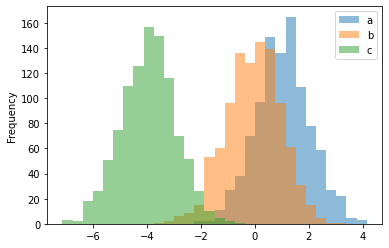

In [99]:
df = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 4,
    }
)

# bins 柱状体的数量
df.plot.hist(alpha=0.5, bins=30)

### 饼图 Pie


<AxesSubplot:ylabel='boss'>

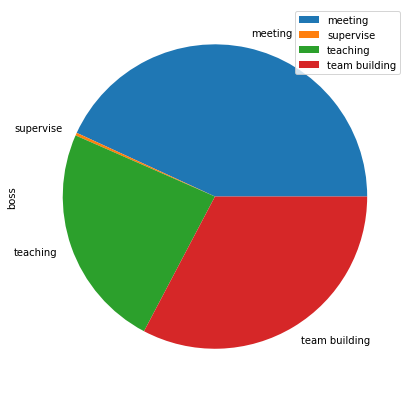

In [102]:
df = pd.DataFrame(
    {"boss": np.random.rand(4)},
    index=["meeting", "supervise", "teaching", "team building"], 
)
df

df.plot.pie(y="boss", figsize=(7,7))

- 多张大饼对比图

使用 subplots

array([<AxesSubplot:ylabel='bigBoss'>, <AxesSubplot:ylabel='smallBoss'>],
      dtype=object)

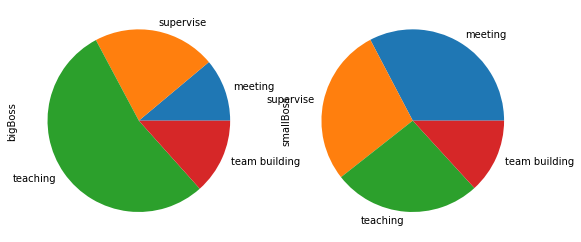

In [112]:
df = pd.DataFrame(
    {
        "bigBoss": np.random.rand(4),
        "smallBoss": np.random.rand(4),
    },
    index=["meeting", "supervise", "teaching", "team building"], 
)
df
df.plot.pie(subplots=True, figsize=(9,9), legend=False)

### 面积图 Area

比如，可以观察出占比（面积）随时间（x轴）的变化。

<AxesSubplot:>

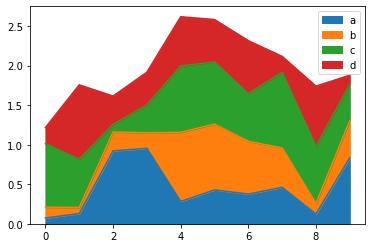

In [107]:
df = pd.DataFrame(
    np.random.rand(10, 4), 
    columns=["a", "b", "c", "d"]
)
df
df.plot.area()

<AxesSubplot:>

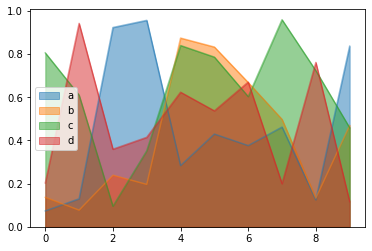

In [108]:
df.plot.area(stacked=False)

### 矩阵运算

In [116]:
data = np.arange(-12, 12).reshape((6, 4))
df = pd.DataFrame(
  data, 
  index=list("abcdef"), 
  columns=list("ABCD"))
df

,A,B,C,D
a,-12,-11,-10,-9
b,-8,-7,-6,-5
c,-4,-3,-2,-1
d,0,1,2,3
e,4,5,6,7
f,8,9,10,11


In [117]:
df['A'] *= 0
df

,A,B,C,D
a,0,-11,-10,-9
b,0,-7,-6,-5
c,0,-3,-2,-1
d,0,1,2,3
e,0,5,6,7
f,0,9,10,11


In [119]:
df.loc['a','A'] = 100
df.loc['a',:] *= 2
df 

,A,B,C,D
a,200,-22,-20,-18
b,0,-7,-6,-5
c,0,-3,-2,-1
d,0,1,2,3
e,0,5,6,7
f,0,9,10,11


In [120]:
df['A'][df['A'] == 0] = -1
df

,A,B,C,D
a,200,-22,-20,-18
b,-1,-7,-6,-5
c,-1,-3,-2,-1
d,-1,1,2,3
e,-1,5,6,7
f,-1,9,10,11


In [165]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [125]:
# np.sqrt(df)
# == 
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [162]:
def func(x):
    return x[0] * 2, x[1] * -1

# axis = 0 or df's index apply func to each column
# axis = 1 or df's columns apply func to each row
# df.apply(func, axis=1, result_type='expand')
# result_type='broadcast': 原 column 和 index 名会继承到新生成的数据中
df.apply(func, axis=1, result_type='broadcast')

,A,B
0,8,-9
1,8,-9
2,8,-9


In [158]:
def func(x):
    return x["A"] * 4

# df.apply(func, axis=1)

df['A'] * 4

0    16
1    16
2    16
Name: A, dtype: int64

In [163]:
def func(r):
    return r[2] * 4

print("origin:\n", df)

last_row = df.apply(func, axis=0)
print("\nlast_row:\n", last_row)

# result_type works for columns
df.iloc[2, :] = last_row
print("\ndf:\n", df)

origin:
    A  B
0  4  9
1  4  9
2  4  9

last_row:
 A    16
B    36
dtype: int64

df:
     A   B
0   4   9
1   4   9
2  16  36


## 文字处理

- 格式转换

In [194]:
py_s = "A,B,C,Aaba,Baca,CABA,dog,cat"

# pd_s = pd.Series(py_s.split(','), dtype="string")
pd_s = pd.Series(py_s.split(','))

In [196]:
print("pd_s type:", pd_s.dtype)
new_pd_s = pd_s.astype("string")
print("new_pd_s type:", new_pd_s.dtype)

pd_s type: object
new_pd_s type: string


In [197]:
print("python lower:\n", py_s.lower())
print("\npandas lower:\n", pd_s.str.lower())
print("\npython len:\n", [len(s) for s in py_s.split(",")])
print("\npandas len:\n", pd_s.str.len())

python lower:
 a,b,c,aaba,baca,caba,dog,cat

pandas lower:
 0       a
1       b
2       c
3    aaba
4    baca
5    caba
6     dog
7     cat
dtype: object

python len:
 [1, 1, 1, 4, 4, 4, 3, 3]

pandas len:
 0    1
1    1
2    1
3    4
4    4
5    4
6    3
7    3
dtype: int64


In [199]:
py_s = ["a_b_c", "jill_jesse", "frank"]
pd_s = pd.Series(py_s, dtype="string")
print("python split:\n", [s.split("_") for s in py_s])
print("\npandas split:\n", pd_s.str.split("_"))

python split:
 [['a', 'b', 'c'], ['jill', 'jesse'], ['frank']]

pandas split:
 0        [a, b, c]
1    [jill, jesse]
2          [frank]
dtype: object


In [200]:
# 不够的cell会补齐 pd.NA
pd_s.str.split("_", expand=True)

,0,1,2
0,a,b,c
1,jill,jesse,<NA>
2,frank,<NA>,<NA>


In [211]:
pd_df = pd.DataFrame([["a", "b"], ["C", "D"]])
print("origin:\n", pd_df)
pd_df.iloc[0,:] = pd_df.iloc[0, :].str.upper()
pd_df


origin:
    0  1
0  a  b
1  C  D


,0,1
0,A,B
1,C,D


- 正则方案

In [212]:
pattern = r"[0-9][a-z]"
s = pd.Series(["1", "1a", "11c", "abc"], dtype="string")
print("s:\n", s)
s.str.contains(pattern)

s:
 0      1
1     1a
2    11c
3    abc
dtype: string


0    False
1     True
2     True
3    False
dtype: boolean

In [213]:
# match() 要完全匹配才会返回 True 
s.str.match(pattern)

0    False
1     True
2    False
3    False
dtype: boolean

In [217]:
py_s = ["1", "1a", "21c", "abc"]
pd_s = pd.Series(py_s, dtype="string")
print("origin:\n", pd_s)

print("\npy_s replace '1' -> '9':\n", [s.replace("1", "9") for s in py_s])
print("\n\npd_s replace '1' -> '9':\n", pd_s.str.replace("1", "9"))

origin:
 0      1
1     1a
2    21c
3    abc
dtype: string

py_s replace '1' -> '9':
 ['9', '9a', '29c', 'abc']


pd_s replace '1' -> '9':
 0      9
1     9a
2    29c
3    abc
dtype: string


In [218]:
# replace all numbers to NUM
print("pd_s replace -> 'NUM':")
pd_s.str.replace(r"[0-9]", "NUM", regex=True)

pd_s replace -> 'NUM':


0        NUM
1       NUMa
2    NUMNUMc
3        abc
dtype: string

In [223]:
s = pd.Series(['a1', 'b2', 'c3'])
print("s:\n", s)
s.str.extract(r"([ab])(\d)")


s:
 0    a1
1    b2
2    c3
dtype: object


,0,1
0,a,1
1,b,2
2,NaN,NaN


- 拼接

In [224]:
s1 = pd.Series(["A", "B", "C", "D"], dtype="string")
s2 = pd.Series(["1", "2", "3", "4"], dtype="string")
s1.str.cat(s2)

0    A1
1    B2
2    C3
3    D4
dtype: string

## 异常数据处理

### 找到NaN数据

In [225]:
df = pd.DataFrame([[1, None],[np.nan, 4]])
print("df:\n", df)
df.isna()

df:
      0    1
0  1.0  NaN
1  NaN  4.0


,0,1
0,False,True
1,True,False


In [227]:
df.notna()
# ==
~df.isna()

,0,1
0,True,False
1,False,True


### NaN的影响

对比 skipna 参数的不同取值，可以发现，在正常运算中，pandas 是不考虑 NaN 值的，也就是说不会把 NaN 带入运算。

比如在计算世界人口数据，发现青少年的数据都是 NaN，计算人口平均年龄的时候，结果是平均龄都偏老，进入了老龄化社会啦？ 
—— 错误的统计，会带来错误的分析结果。一定要注意数据里有没有 NaN。

In [230]:
df = pd.DataFrame({
    "a": [1, None, 1], 
    "b": [np.nan, 4, 4]
})
print("df:\n", df)
print("\nskipped NaN:\n", df.mean(axis=0))
print("\n\nnot skipped:\n", df.mean(axis=0, skipna=False))

df:
      a    b
0  1.0  NaN
1  NaN  4.0
2  1.0  4.0

skipped NaN:
 a    1.0
b    4.0
dtype: float64


not skipped:
 a   NaN
b   NaN
dtype: float64


### 移除NaN

In [234]:
df = pd.DataFrame({
    "a": [1, None, 3], 
    "b": [4, 5, 6]
})
print("df:\n", df)
df.dropna(axis=0)

df:
      a  b
0  1.0  4
1  NaN  5
2  3.0  6


,a,b
0,1.0,4
2,3.0,6


### 填充NaN

In [235]:
a_mean = df["a"].mean()
df["a"].fillna(a_mean, inplace=True)

df

,a,b
0,1.0,4
1,2.0,5
2,3.0,6


### 不符合范围的值

<AxesSubplot:>

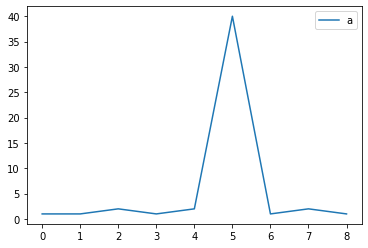

In [236]:
df = pd.DataFrame({
    "a": [1, 1, 2, 1, 2, 40, 1, 2, 1],
})
df.plot()

发现这组数据中的 40 很不符合逻辑，用 clip() 设置一下数据的范围，超出范围的就被剪裁到范围边界。

<AxesSubplot:>

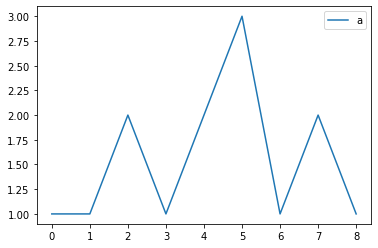

In [237]:
df["a"] = df["a"].clip(lower=0, upper=3)
df.plot()

## 时间数据

参考 [文档](https://pandas.pydata.org/docs/user_guide/timeseries.html)

### 读时间序列数据

In [238]:
df = pd.DataFrame({
    "time": ["2022/03/12", "2022/03/13", "2022/03/14"],
    "value": [1,2,3]
})
print(df)
print("\n\ntime:\n",df["time"])

         time  value
0  2022/03/12      1
1  2022/03/13      2
2  2022/03/14      3


time:
 0    2022/03/12
1    2022/03/13
2    2022/03/14
Name: time, dtype: object


In [239]:
pd.to_datetime(df["time"])

0   2022-03-12
1   2022-03-13
2   2022-03-14
Name: time, dtype: datetime64[ns]

In [245]:
s = pd.Series(
    ["2022/03/12", "2022.03.13", "14/03/2022"]
)

type(s)

pandas.core.series.Series

In [246]:
# format

# %m 月
# %d 日
# %Y 年的全称
# %% 比配一个 %
# %S 秒
# %H 时
# %M 分

pd.to_datetime(
    [
        "1@21@2022%%11|11|32", 
        "12@01@2022%%44|02|2", 
        "4@01@2022%%14|22|2"
    ],
    format="%m@%d@%Y%%%%%S|%H|%M"
)

DatetimeIndex(['2022-01-21 11:32:11', '2022-12-01 02:02:44',
               '2022-04-01 22:02:14'],
              dtype='datetime64[ns]', freq=None)

### 自建时间序列

In [247]:
import datetime

start = datetime.datetime(2022, 3, 12)
end = datetime.datetime(2022, 3, 18)

index = pd.date_range(start, end)
index

DatetimeIndex(['2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17', '2022-03-18'],
              dtype='datetime64[ns]', freq='D')

In [249]:
print(
    "range(1, 10, 2)\n", 
    list(range(1, 10, 2))
)
print(
    "\npd.date_range()\n",
    pd.date_range(start, end, freq="48h")
)

range(1, 10, 2)
 [1, 3, 5, 7, 9]

pd.date_range()
 DatetimeIndex(['2022-03-12', '2022-03-14', '2022-03-16', '2022-03-18'], dtype='datetime64[ns]', freq='48H')


In [254]:
print(
    "np.linspace(-1, 1, 5)\n",
    # np.linspace(-1, 1, 5)
    # default number is 50
    np.linspace(-1, 1)
)
print(
    "\npd.date_range(start, end, periods=5)\n",
    # pd.date_range(start, end, periods=5)
    pd.date_range(start, end)
)

np.linspace(-1, 1, 5)
 [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]

pd.date_range(start, end, periods=5)
 DatetimeIndex(['2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17', '2022-03-18'],
              dtype='datetime64[ns]', freq='D')


### 选取时间

<AxesSubplot:>

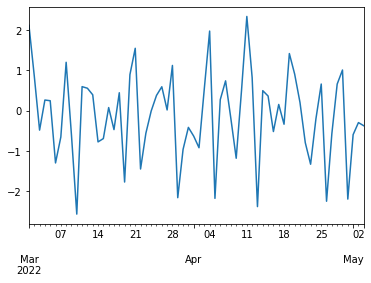

In [268]:
start = datetime.datetime(2022, 3, 1)
end = datetime.datetime(2022, 5, 3)

rng = pd.date_range(start, end)
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts.plot()

In [273]:
ts

2022-03-01    2.114170
2022-03-02    0.863135
2022-03-03   -0.480679
2022-03-04    0.264597
2022-03-05    0.247305
                ...   
2022-04-29    1.008267
2022-04-30   -2.189011
2022-05-01   -0.592845
2022-05-02   -0.294082
2022-05-03   -0.371999
Freq: D, Length: 64, dtype: float64

<AxesSubplot:>

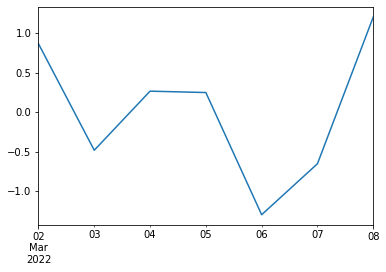

In [275]:
ts[1:8].plot()

### 时间运算

In [278]:
rng = pd.date_range("2022-01-01", "2022-01-07")
rng + pd.Timedelta(weeks=1)

DatetimeIndex(['2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14'],
              dtype='datetime64[ns]', freq='D')

In [279]:
rng + 2*pd.Timedelta(days=3) # +6 days

DatetimeIndex(['2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12', '2022-01-13'],
              dtype='datetime64[ns]', freq='D')

In [307]:
rng = pd.date_range("2022-02-08", "2022-02-11")

# rng.dayofweek; rng.weekofyear; rng.weekday
rng.dayofyear

# rng.weekofyear
# ==
type(pd.DatetimeIndex.isocalendar(rng).week)

rng.weekday
# type(rng.weekday)

rng.day_name()
rng.month_name()

Index(['February', 'February', 'February', 'February'], dtype='object')

In [306]:
rng.strftime("%m/%d/%Y") 


Index(['02/08/2022', '02/09/2022', '02/10/2022', '02/11/2022'], dtype='object')

### 时区

In [310]:
# 检查 datetime range 是否设置了时区
rng.tz is None

True

默认是不带时区的，如果需要，要特别标注好时区 tz_localize()。

In [311]:
s = pd.to_datetime(
    ["2022/03/12 22:11", "2022/03/12 12:11", "2022/03/12 2:11"]
)
s_us = s.tz_localize("America/New_York")
s_us

DatetimeIndex(['2022-03-12 22:11:00-05:00', '2022-03-12 12:11:00-05:00',
               '2022-03-12 02:11:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

或者初始化时用 tz 设置好时区：

In [317]:
rng = pd.date_range(
    "2022-01-08", "2022-01-11", 
    tz="America/New_York")
rng

DatetimeIndex(['2022-01-08 00:00:00-05:00', '2022-01-09 00:00:00-05:00',
               '2022-01-10 00:00:00-05:00', '2022-01-11 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

转回中国时区

In [318]:
s_cn = s_us.tz_convert("Asia/Shanghai")
s_cn

DatetimeIndex(['2022-03-13 11:11:00+08:00', '2022-03-13 01:11:00+08:00',
               '2022-03-12 15:11:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

获取国家的时区

In [314]:
import pytz

pytz.country_timezones('CN')

['Asia/Shanghai', 'Asia/Urumqi']

In [316]:
pytz.country_timezones('US')

29

## 融合数据 Concat 和 Merge

参考 [文档](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

In [319]:
df1 = pd.DataFrame({
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
}, index=[0, 1, 2, 3],)


df2 = pd.DataFrame({
    "A": ["A4", "A5", "A6", "A7"],
    "B": ["B4", "B5", "B6", "B7"],
    "C": ["C4", "C5", "C6", "C7"],
    "D": ["D4", "D5", "D6", "D7"],
}, index=[4, 5, 6, 7],)


df3 = pd.DataFrame({
    "A": ["A8", "A9", "A10", "A11"],
    "B": ["B8", "B9", "B10", "B11"],
    "C": ["C8", "C9", "C10", "C11"],
    "D": ["D8", "D9", "D10", "D11"],
}, index=[8, 9, 10, 11],)

In [322]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


如果想给合并后的数据带上索引栏，可以加上个主 key ：

In [324]:
all_classes = pd.concat(
    [df1, df2, df3], 
    keys=["x", "y", "z"])
all_classes

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [326]:
# 查看某个 key

all_classes.loc["x"]

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


pd.concat 的默认是上下拼接的，也可以指定进行左右拼接。

In [333]:
df4 = pd.DataFrame({
    "B": ["B2", "B3", "B6", "B7"],
    "D": ["D2", "D3", "D6", "D7"],
    "F": ["F2", "F3", "F6", "F7"],
}, index=[2, 3, 6, 7],)
print(df1)
print(df4)
pd.concat([df1, df4], axis=1)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


上面这种模式叫做 `join="outer"` ，是拼接（concat）的默认方式。可以试试 `join="inner"`

In [332]:
print(df1)
print(df4)
pd.concat([df1, df4], axis=1, join="inner")

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


有时需要一个全新索引，用 ignore_index 就可以：

In [334]:
pd.concat(
    [df1, df4], 
    ignore_index=True, 
    sort=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [335]:
new_col = pd.Series(["X0", "X1", "X2", "X3"], name="X")

print(df1)
print(new_col)

pd.concat([df1, new_col], axis=1)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object


,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [338]:
new_row = pd.Series(
    ["X0", "X1", "X2", "X3"],
    index=["A", "B", "C", "D"])

# new_row.to_frame().T
pd.concat(
    [df1, new_row.to_frame().T], 
    ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


### 融合Merge

concat 可以一次性合并多个 df，可以【左右】，也可以【上下】拼接， 但是 merge 是用来针对两张 df 做【左右】拼接的。 

In [349]:
left = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
})

right = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
})

pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


对比 concat()，merge() 在 join 的时候，有更多选择：
- outer: 集合两个 df 所有 的 key
- inner: 集合两个 df 同时拥有 的 key （默认）
- left: 仅考虑左边 df 所有 的 key
- right: 仅考虑右边 df 所有 的 key
- cross: 对于两个 df key 的笛卡尔积

In [353]:
left = pd.DataFrame({
    "key1": ["K0", "K0", "K1", "K2"],
    "key2": ["K0", "K1", "K0", "K1"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
})

right = pd.DataFrame({
    "key1": ["K0", "K1", "K1", "K2"],
    "key2": ["K0", "K0", "K0", "K0"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
})

pd.merge(left, right, on=["key1", "key2"])
# pd.merge(left, right, on=["key1", "key2"], how="inner")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


pd.merge(left, right, on=["key1", "key2"], how="outer")

In [356]:
pd.merge(left, right, on=["key1", "key2"], how="left")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [357]:
pd.merge(left, right, on=["key1", "key2"], how="right")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [366]:
# cross 的组合表特别大，因为它是两个 key 的笛卡尔积

pd.merge(left, right, how="cross")

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### 接入Join

join 是 df.join()，它其实更像是 merge 和 concat 的某种结合体，merge() 是基于给定的某个 on="key" 来拼接， 而 df.join() 使用的 key 可以和 concat() 一样，都是 index，也可以像 merge() 带一个 on="key" 去使用一个 column 作为索引。

In [375]:
left.set_index(["key1", "key2"]).join(right.set_index(["key1", "key2"]))

A   B    C    D
key1 key2                  
K0   K0    A0  B0   C0   D0
     K1    A1  B1  NaN  NaN
K1   K0    A2  B2   C1   D1
     K0    A2  B2   C2   D2
K2   K1    A3  B3  NaN  NaN

In [373]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [374]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [376]:
left = pd.DataFrame({
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    "key": ["K0", "K1", "K0", "K1"],
})

right = pd.DataFrame({
    "C": ["C0", "C1"],
    "D": ["D0", "D1"]
}, index=["K0", "K1"])

left.join(right, on="key")

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [377]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


In [378]:
right

,C,D
K0,C0,D0
K1,C1,D1


## 数据分组 Groupby